In [1]:
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv", encoding= 'latin1')   # 'utf-8' or 'latin1' 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement 
# 7. Website
# 8. Deployment

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [8]:
df.sample(10)   # random 10 records shown

,v1,v2
407,ham,Hello! Good week? Fancy a drink or something l...
5446,ham,I am back. Good journey! Let me know if you ne...
3770,ham,"Hi, wlcome back, did wonder if you got eaten b..."
3139,spam,sexy sexy cum and text me im wet and warm and ...
3024,ham,"What part of \don't initiate\"" don't you under..."
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...
1247,ham,Horrible gal. Me in sch doing some stuff. How ...
4140,ham,Beautiful truth : Expression of the face could...
5130,ham,Any way where are you and what doing.
302,ham,Oh and by the way you do have more food in you...


In [9]:
#renaming the columns 
df.rename(columns = {'v1': 'target' , 'v2' : 'text'}, inplace= True)
df.sample(10)

,target,text
3052,ham,Pls send me the correct name da.
5095,ham,K.k.this month kotees birthday know?
3455,ham,Ok. I.ll do you right later.
2031,ham,"I noe la... U wana pei bf oso rite... K lor, o..."
216,ham,Tired. I haven't slept well the past few nights.
720,ham,Oh is it? Send me the address
22,ham,So Ì_ pay first lar... Then when is da stock c...
4588,ham,Have you not finished work yet or something?
2538,ham,The monthly amount is not that terrible and yo...
1859,ham,What's up. Do you want me to come online?


In [10]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [17]:
df = df.drop_duplicates(keep= 'first')    #first occurrence will set to false and rest true and won't drop the first occurrence. first,last,false

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## EDA

In [20]:
# GIVES UNDERSTANDING OF THE DATA
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


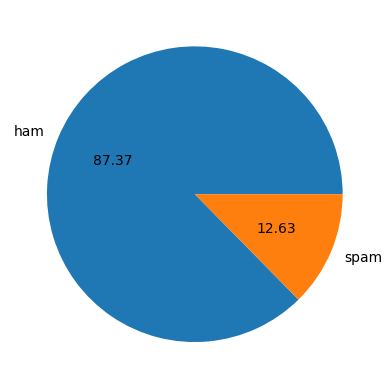

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['ham','spam'], autopct='%0.2f')
plt.show()

In [23]:
# data is imbalanced

In [24]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']= df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
#len of words
df['num_words'] =df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#len of sentence in each record
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [31]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# not spam or ham 
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

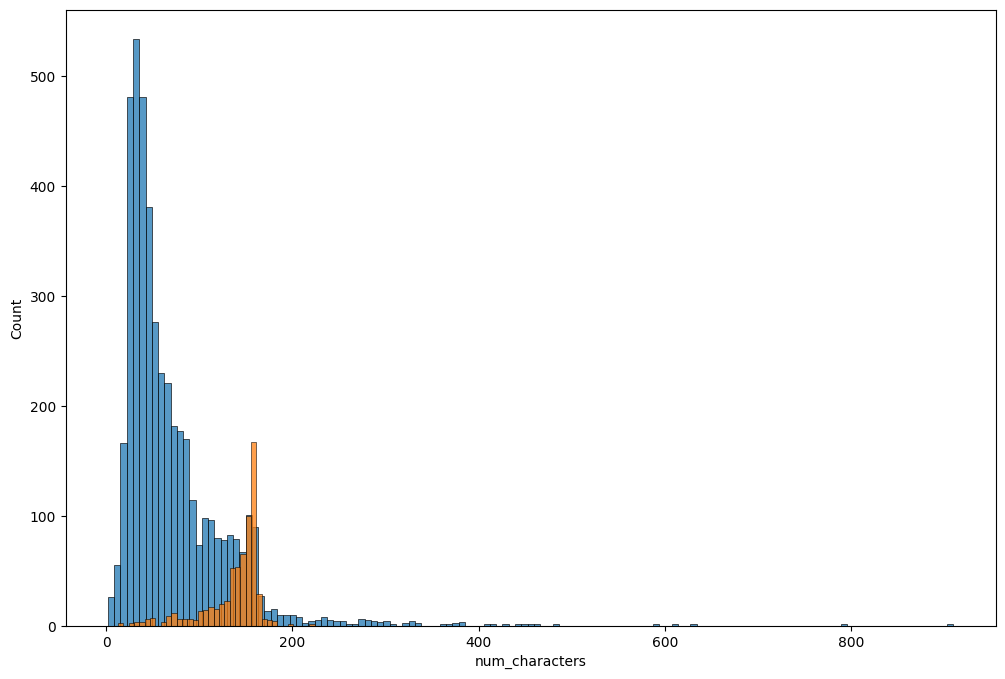

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

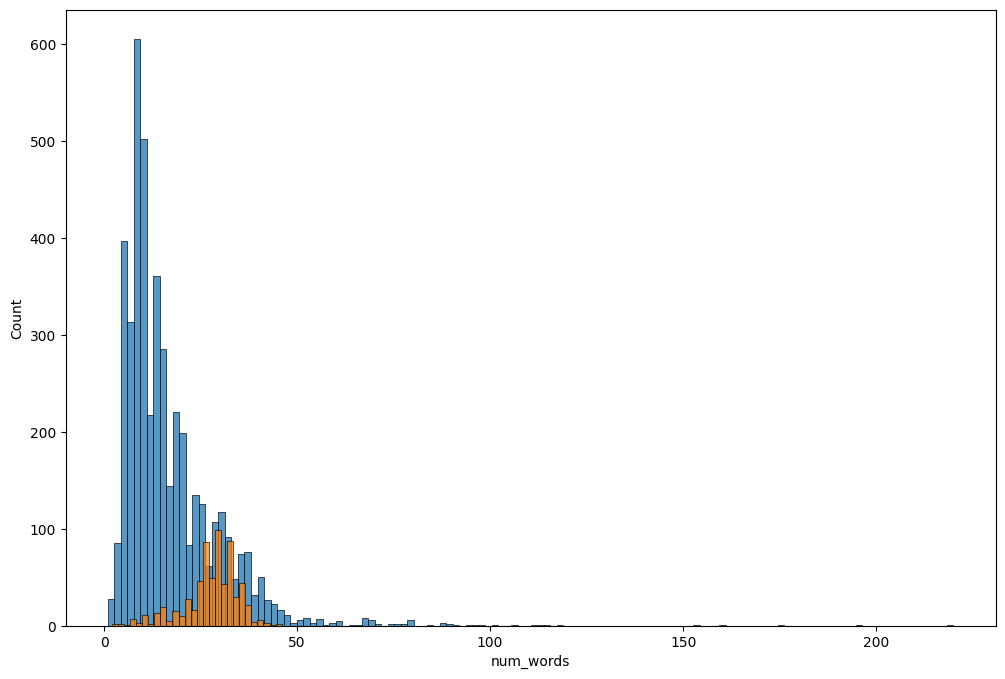

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

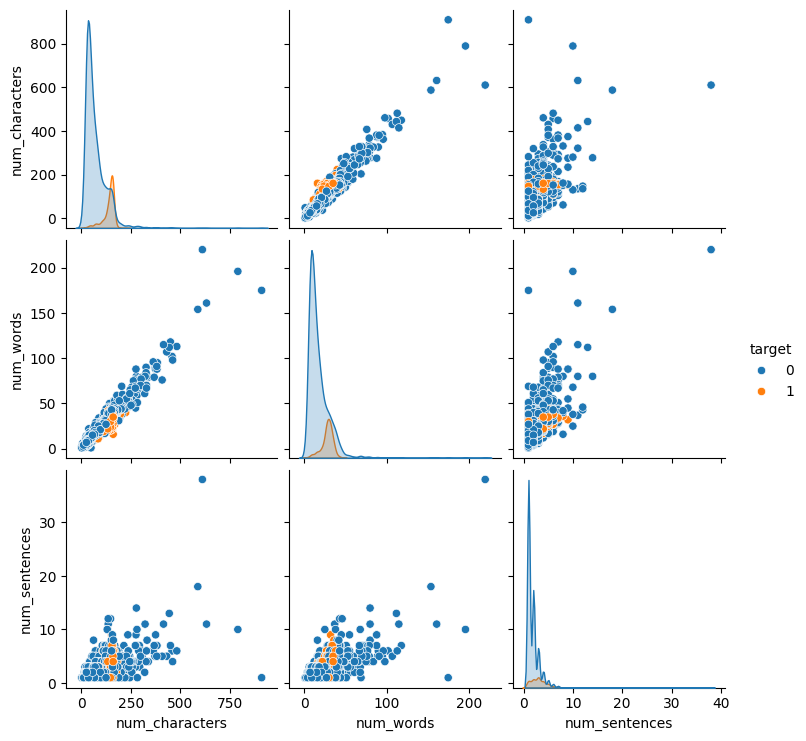

In [40]:
sns.pairplot(df, hue='target')

<Axes: >

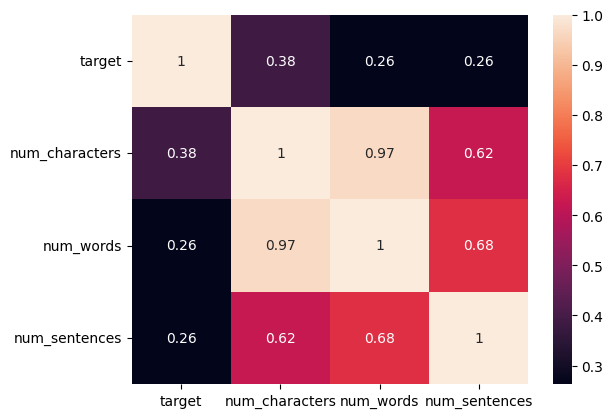

In [41]:
df1 = df[['target','num_characters', 'num_words', 'num_sentences']]
sns.heatmap(df1.corr(), annot=True)

In [42]:
# num_characters and num_words are highly correlated , target and num_characters are more correlated wrt 2 other . Implieas Multicollinearity 
# we need to remove 2 others 

## Text preprocessing 

In [43]:
#1. lower case
#2. tokenization
#3. remove punctuation and stop words
#4. remove special words
#5. stemming

In [44]:
from nltk.corpus import stopwords
import string

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [48]:
preprocess_text("Hi i am riya gupta . I am loving my work on ML a lot . I am enjoying my time on it")

'hi riya gupta love work ml lot enjoy time'

In [49]:
preprocess_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [50]:
df['text'].apply(preprocess_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [51]:
df['transformed_text'] = df['text'].apply(preprocess_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
%pip install wordcloud

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   -------------------- ------------------- 153.6/300.6 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [63]:
not_spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

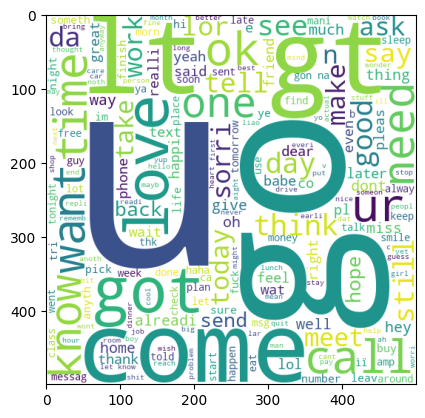

In [64]:
plt.imshow(not_spam_wc)

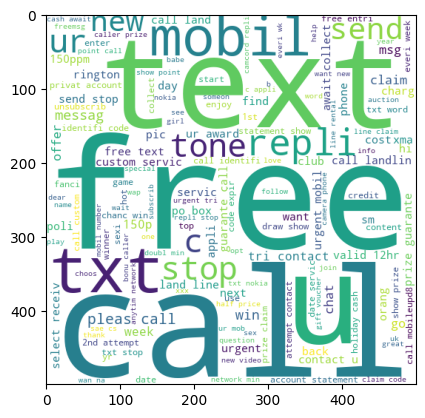

In [65]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

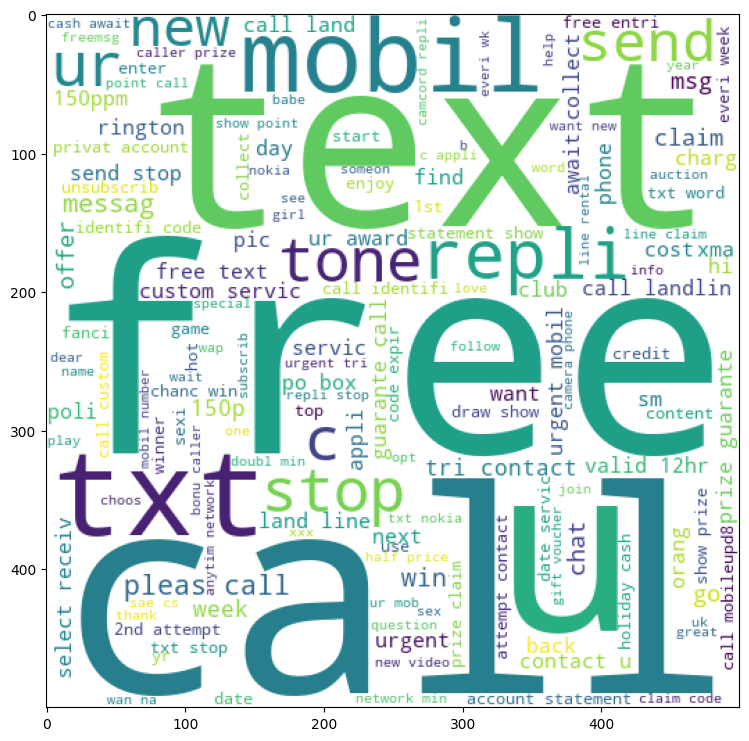

In [66]:
plt.figure(figsize=(18, 9))
plt.imshow(spam_wc)

In [68]:
#let's find the first 30 most common words used in the spam text or sms 
spam_corpus = []
for sentence in df[df['target']==1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [69]:
len(spam_corpus)

9939

In [70]:
# so we have 9939 spam words

from collections import Counter
Counter(spam_corpus)      #provides dict with the count of the occurence 

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [73]:
spam_word_count = Counter(spam_corpus)
spam_word_count.most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [78]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [79]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

## Model Building

In [80]:
# It's a saying that Naive bayes is the good algorithm for the Text data

In [81]:
# Text Vectorization
# Using BOW= Bag of words

In [82]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [84]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [85]:
X.shape

(5169, 6708)

In [86]:
y = df['target'].values

In [87]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [93]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
#We are checking the precision score we want true positives to be less . W want lesser spam mess

In [94]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [99]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [100]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [101]:
# Now We will use the Word represetation TfIdf

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [111]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [112]:
X.shape

(5169, 6708)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [114]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [115]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [116]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [117]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [118]:
# tfidf -> mnb

In [119]:
%pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 5.2 MB/s eta 0:00:20
   ---------------------------------------- 0.7/99.8 MB 7.9 MB/s eta 0:00:13
    --------------------------------------- 1.6/99.8 MB 11.5 MB/s eta 0:00:09
   - -------------------------------------- 2.9/99.8 MB 15.5 MB/s eta 0:00:07
   - -------------------------------------- 4.6/99.8 MB 19.4 MB/s eta 0:00:05
   -- ------------------------------------- 6.4/99.8 MB 22.6 MB/s eta 0:00:05
   -- ------------------------------------- 7.2/99.8 MB 22.1 MB/s eta 0:00:05
   --- ------------------------------------ 8.2/99.8 MB 21.7 MB/s eta 0:00:05
   --- ------------------------------------ 9.0/99.8 MB 21.4 MB/s eta 0:00:05
   --- ------------------------------------ 9.9/99.8 MB 21.1 MB/s eta 0:00:05
   ---- ----------------------------------- 10.8/99.8 MB 24.2 MB/s eta 0:00:04
   ---- ----------------------------------- 11.7/99.8 MB 24.2 MB/s eta 0:

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [122]:
lrc = LogisticRegression(penalty= 'l1', solver= 'liblinear')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth= 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=2, n_estimators=50)
abc = AdaBoostClassifier(random_state=2, n_estimators=50)
bc = BaggingClassifier(random_state=2, n_estimators=50)
etc = ExtraTreesClassifier(random_state=2, n_estimators=50)
gbc = GradientBoostingClassifier(random_state=2, n_estimators=50)
xgbc = XGBClassifier(random_state=2, n_estimators=50)
mnb = MultinomialNB()

In [123]:
clfs = {
    'LR' :lrc,
    'SVC': svc,
    'DT' : dtc,
    'RF' : rfc,
    'BC' : bc,
    'XGB' : xgbc,
    'NB' : mnb,
    'ETC' : etc,
    'Adaboost' : abc,
    'GBDT' : gbc,
    'KN' : knc
}

In [126]:
def train_classifier(clf, X_train,X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [127]:
train_classifier(svc, X_train,X_test, y_train, y_test)

(0.9729206963249516, 0.9741379310344828)

In [128]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train,X_test, y_train, y_test)

    print(name ,'-> precision', precision, ' accuracy', accuracy)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

LR -> precision 0.94  accuracy 0.9516441005802708
SVC -> precision 0.9741379310344828  accuracy 0.9729206963249516
DT -> precision 0.8461538461538461  accuracy 0.9361702127659575
RF -> precision 1.0  accuracy 0.971953578336557
BC -> precision 0.8625954198473282  accuracy 0.9584139264990329
XGB -> precision 0.9435483870967742  accuracy 0.9729206963249516
NB -> precision 1.0  accuracy 0.9593810444874274
ETC -> precision 0.9824561403508771  accuracy 0.9729206963249516


c:\SMS-EmailSpamClassifier\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost -> precision 0.9454545454545454  accuracy 0.9613152804642167
GBDT -> precision 0.9238095238095239  accuracy 0.9526112185686654
KN -> precision 1.0  accuracy 0.9003868471953579


In [130]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Precision': precision_scores, 'accuracy': accuracy_scores})

In [131]:
performance_df

,Algorithm,Precision,accuracy
0,LR,0.940000,0.951644
1,SVC,0.974138,0.972921
2,DT,0.846154,0.936170
3,RF,1.000000,0.971954
4,BC,0.862595,0.958414
5,XGB,0.943548,0.972921
6,NB,1.000000,0.959381
7,ETC,0.982456,0.972921
8,Adaboost,0.945455,0.961315
9,GBDT,0.923810,0.952611


In [133]:
performance_df.sort_values('Precision', ascending= False)

,Algorithm,Precision,accuracy
3,RF,1.000000,0.971954
6,NB,1.000000,0.959381
10,KN,1.000000,0.900387
7,ETC,0.982456,0.972921
1,SVC,0.974138,0.972921
8,Adaboost,0.945455,0.961315
5,XGB,0.943548,0.972921
0,LR,0.940000,0.951644
9,GBDT,0.923810,0.952611
4,BC,0.862595,0.958414


## Model Improvement

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [137]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [139]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train,X_test, y_train, y_test)

    print(name ,'-> precision', precision, ' accuracy', accuracy)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

LR -> precision 0.9702970297029703  accuracy 0.9584139264990329
SVC -> precision 0.9747899159663865  accuracy 0.9758220502901354
DT -> precision 0.8415841584158416  accuracy 0.9332688588007737
RF -> precision 0.9829059829059829  accuracy 0.9758220502901354
BC -> precision 0.8682170542635659  accuracy 0.9584139264990329
XGB -> precision 0.9262295081967213  accuracy 0.9671179883945842
NB -> precision 1.0  accuracy 0.9709864603481625
ETC -> precision 0.9745762711864406  accuracy 0.9748549323017408


c:\SMS-EmailSpamClassifier\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost -> precision 0.9292035398230089  accuracy 0.960348162475822
GBDT -> precision 0.9191919191919192  accuracy 0.9468085106382979
KN -> precision 1.0  accuracy 0.9052224371373307


In [143]:
performance_df1 = pd.DataFrame({'Algorithm' : clfs.keys(), 'Precision_m': precision_scores, 'accuracy_m': accuracy_scores})

In [144]:
performance_df1 = performance_df1.merge(performance_df, on = 'Algorithm')

In [145]:
performance_df1

,Algorithm,Precision_m,accuracy_m,Precision,accuracy
0,LR,0.970297,0.958414,0.940000,0.951644
1,SVC,0.974790,0.975822,0.974138,0.972921
2,DT,0.841584,0.933269,0.846154,0.936170
3,RF,0.982906,0.975822,1.000000,0.971954
4,BC,0.868217,0.958414,0.862595,0.958414
5,XGB,0.926230,0.967118,0.943548,0.972921
6,NB,1.000000,0.970986,1.000000,0.959381
7,ETC,0.974576,0.974855,0.982456,0.972921
8,Adaboost,0.929204,0.960348,0.945455,0.961315
9,GBDT,0.919192,0.946809,0.923810,0.952611


In [151]:
# Trying normalization o the X or input features

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [152]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X = mmc.fit_transform(X)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [153]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train,X_test, y_train, y_test)

    print(name ,'-> precision', precision, ' accuracy', accuracy)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

LR -> precision 0.9702970297029703  accuracy 0.9584139264990329
SVC -> precision 0.9747899159663865  accuracy 0.9758220502901354
DT -> precision 0.8173076923076923  accuracy 0.9303675048355899
RF -> precision 0.9829059829059829  accuracy 0.9758220502901354
BC -> precision 0.8682170542635659  accuracy 0.9584139264990329
XGB -> precision 0.9568965517241379  accuracy 0.9690522243713733
NB -> precision 1.0  accuracy 0.9709864603481625
ETC -> precision 0.9745762711864406  accuracy 0.9748549323017408


c:\SMS-EmailSpamClassifier\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost -> precision 0.9292035398230089  accuracy 0.960348162475822
GBDT -> precision 0.9191919191919192  accuracy 0.9468085106382979
KN -> precision 1.0  accuracy 0.9052224371373307


In [156]:
performance_df2 = pd.DataFrame({'Algorithm' : clfs.keys() , 'Precision_sc' : precision_scores, 'Accuracy_sc': accuracy_scores})

In [157]:
performance_df2 = performance_df2.merge(performance_df1, on = 'Algorithm')

In [158]:
performance_df2

,Algorithm,Precision_sc,Accuracy_sc,Precision_m,accuracy_m,Precision,accuracy
0,LR,0.970297,0.958414,0.970297,0.958414,0.940000,0.951644
1,SVC,0.974790,0.975822,0.974790,0.975822,0.974138,0.972921
2,DT,0.817308,0.930368,0.841584,0.933269,0.846154,0.936170
3,RF,0.982906,0.975822,0.982906,0.975822,1.000000,0.971954
4,BC,0.868217,0.958414,0.868217,0.958414,0.862595,0.958414
5,XGB,0.956897,0.969052,0.926230,0.967118,0.943548,0.972921
6,NB,1.000000,0.970986,1.000000,0.970986,1.000000,0.959381
7,ETC,0.974576,0.974855,0.974576,0.974855,0.982456,0.972921
8,Adaboost,0.929204,0.960348,0.929204,0.960348,0.945455,0.961315
9,GBDT,0.919192,0.946809,0.919192,0.946809,0.923810,0.952611


In [154]:
# Now I will add one of the three columns that I made earlier and check the results


In [162]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [166]:
#appending the num_characters column in X
X = np.hstack(X, df['num_characters'].values.reshape((-1,1)))

TypeError: hstack() takes 1 positional argument but 2 were given

In [167]:
#Applying stacking

estimators = [('svm', svc), ('et', etc), ('nb', mnb)]

In [168]:
final_estimator = RandomForestClassifier()

In [169]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators, final_estimator)

In [170]:
clf.fit(X_train, y_train)
y_pred = clf.predict(y_test)
print(accuracy_score(y_pred, y_test))
print(precision_score(y_pred, y_test))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [171]:
import pickle 

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [174]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [175]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [176]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [177]:
X.shape

(5169, 3000)

In [178]:
y.shape

(5169,)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [180]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))